# Pyaudio : play audio on python

    ref(1): https://people.csail.mit.edu/hubert/pyaudio/
    ref(2): https://people.csail.mit.edu/hubert/pyaudio/docs/
    troulbeshootin: https://stackoverflow.com/a/55630212
    wheel: https://www.lfd.uci.edu/~gohlke/pythonlibs/#pyaudio

In [18]:
import pyaudio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def note(f, duration, fps, mod):
    # generate samples, note conversion to float32 array
    circumference = 2 * np.pi * f * mod
    samples = np.arange(fps * duration)
    wave = np.sin(circumference * samples / fps).astype(np.float32)
    return wave

In [3]:
def major_triad(f, duration, fps):
    # generate samples, note conversion to float32 array
    root = note(f, duration, fps, 1)
    third = note(f, duration, fps, 5/4)
    fifth = note(f, duration, fps, 3/2)
    major = (root + third + fifth)/3
    return major


def minor_triad(f, duration, fps):
    # generate samples, note conversion to float32 array
    root = note(f, duration, fps, 1)
    third = note(f, duration, fps, 6/5)
    fifth = note(f, duration, fps, 3/2)
    minor = (root + third + fifth)/3
    return minor

In [4]:
def major_scale(f, duration, fps):
    # generate samples, note conversion to float32 array
    # noise = np.random.uniform(0, 1, size=int(fps*duration))*0.00001
    root = note(f, duration, fps, 1)
    second = note(f, duration, fps, 9/8)
    third = note(f, duration, fps, 5/4)
    fourth = note(f, duration, fps, 4/3)
    fifth = note(f, duration, fps, 3/2)
    sixth = note(f, duration, fps, 5/3)
    seventh = note(f, duration, fps, 15/8)
    octave = note(f, duration, fps, 2)
    scale = np.append(root, [second, third, fourth, fifth, sixth, seventh, octave])
    return scale

def minor_scale(f, duration, fps):
    # generate samples, note conversion to float32 array
    # noise = np.random.uniform(0, 1, size=int(fps*duration))*0.00001
    root = note(f, duration, fps, 1)
    second = note(f, duration, fps, 9/8)
    third = note(f, duration, fps, 6/5)
    fourth = note(f, duration, fps, 4/3)
    fifth = note(f, duration, fps, 3/2)
    sixth = note(f, duration, fps, 8/5)
    seventh = note(f, duration, fps, 9/5)
    octave = note(f, duration, fps, 2)
    scale = np.append(root, [second, third, fourth, fifth, sixth, seventh, octave])
    return scale

In [6]:
def play(sample, fps=48000, repeat=1):
    p = pyaudio.PyAudio()
    # for paFloat32 sample values must be in range [-1.0, 1.0]
    stream = p.open(format=pyaudio.paFloat32,
                    channels=1,
                    rate=fps,
                    output=True)
    for n in range(repeat):
        stream.write(sample.tobytes())
    stream.stop_stream()
    stream.close()
    p.terminate()
    return True

## visualize audio data over time domain

In [10]:
# sine frequency, Hz, may be float
f = 250.0
# in seconds, may be float
duration = 1
# sampling rate, Hz, must be integer
# fps == Frame Per Second
fps = 48000 # sounds a lot better.. 44100 causes some kind of ringing noise
maj_tri = major_triad(f, duration, fps)
min_tri = minor_triad(f, duration, fps)
maj_scale = major_scale(f, duration, fps)
maj_scale = minor_scale(f, duration, fps)

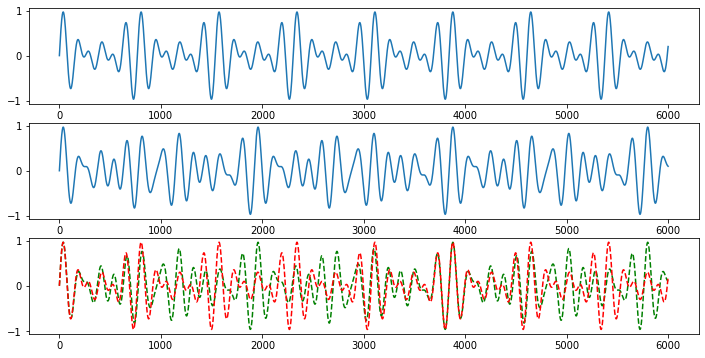

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(311)
plt.plot(maj_tri[:6000])
plt.subplot(312)
plt.plot(min_tri[:6000])
plt.subplot(313)
plt.plot(min_tri[:6000], 'g--', maj_tri[:6000], 'r--')
plt.show()

## visualize audio data over frequency domain

In [36]:
maj_tri

array([ 0.        ,  0.04089383,  0.08171378, ..., -0.04077898,
       -0.02723306, -0.01363067], dtype=float32)

In [25]:
data_fft = np.fft.fft(maj_tri)

In [26]:
frequencies = np.abs(data_fft)

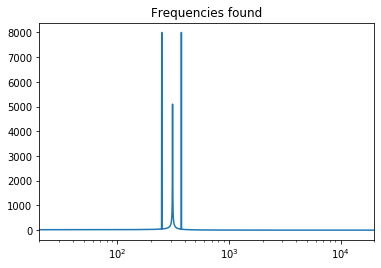

In [49]:
plt.plot(frequencies)
plt.title("Frequencies found")
plt.xlim(20,20000)
plt.xscale('log')
plt.show()